### Name: Abhinav Deepak Mali
### Roll Number: 0084
### Batch: T3
### Class: TE Computer
### Subject: Data Science and Big Data Analytics
### Assignment Number: 9

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("C:/Users/user/OneDrive/Documents/DSBDA/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_isna = data.isna().sum()
data_isna[data_isna > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# 1. Deleting columns with most unique values

In [7]:
data_str = data.copy()
for i in data_str.columns:
    data_str[i] = data_str[i].apply(lambda x: str(x))
data_str.replace('nan',np.nan,inplace=True)

data_str.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
PassengerId,891,891,1,1
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Fare,891,248,8.05,43
Cabin,204,147,B96 B98,4
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644


In [8]:
data = data.drop(columns=[
    # too many unique values
    'PassengerId','Name','Ticket',
    # too many null values
    'Cabin'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
data_str = data.copy()
for i in data_str.columns:
  data_str[i] = data_str[i].apply(lambda x:str(x))
data_str.replace('nan',np.nan,inplace=True)

data_unique = data_str.describe(include='object').T.sort_values(by='unique',ascending=False)
data = data[data_unique.index]
data_unique

,count,unique,top,freq
Fare,891,248,8.05,43
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644
Survived,891,2,0,549
Sex,891,2,male,577


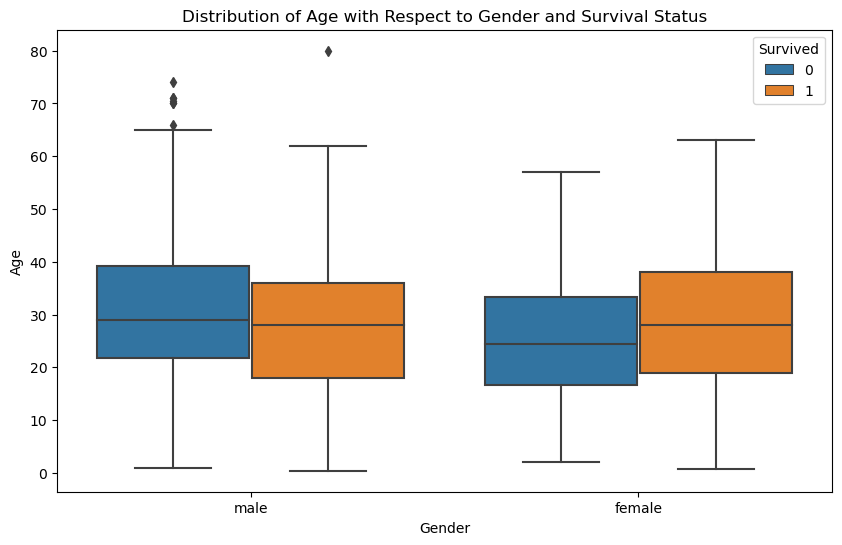

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)
plt.title('Distribution of Age with Respect to Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

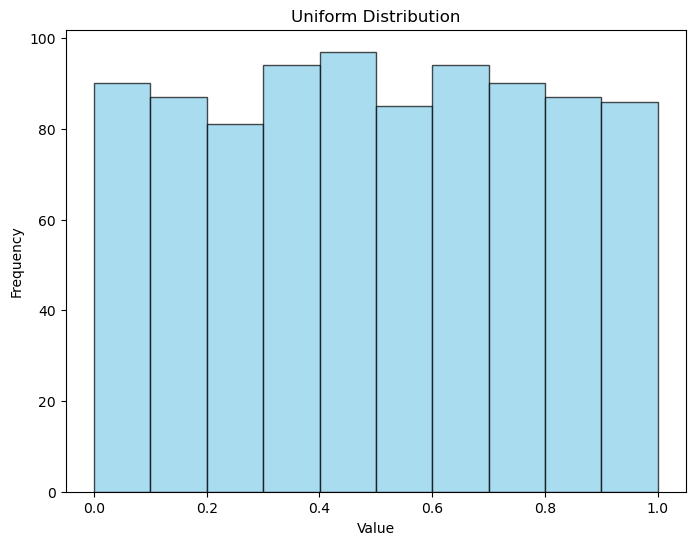

Mean of Survivors: 0.3838383838383838


In [11]:
mean_survivors = np.mean(data.Survived)

# Generate a uniform distribution
uniform_distribution = np.random.uniform(low=0, high=1, size=len(data.Survived))

# Plot the uniform distribution
plt.figure(figsize=(8, 6))
plt.hist(uniform_distribution, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print("Mean of Survivors:", mean_survivors)

Text(0.5, 1.0, 'Scatter plot for survival by Gender')

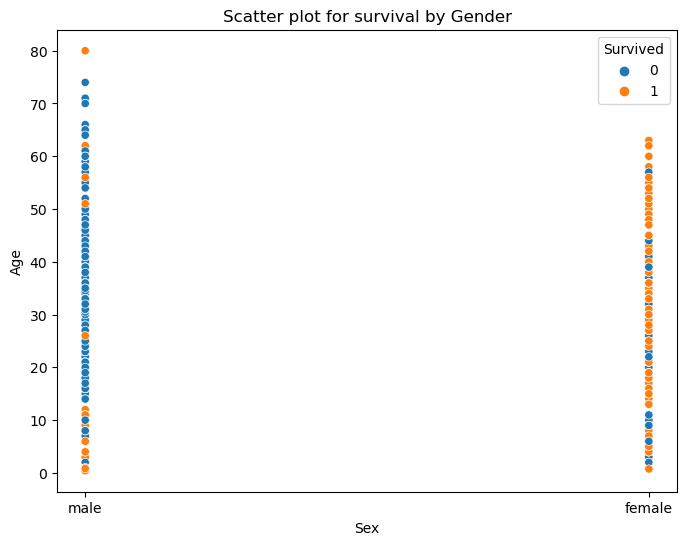

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='Sex', y='Age', data=data, hue='Survived')

plt.title('Scatter plot for survival by Gender')

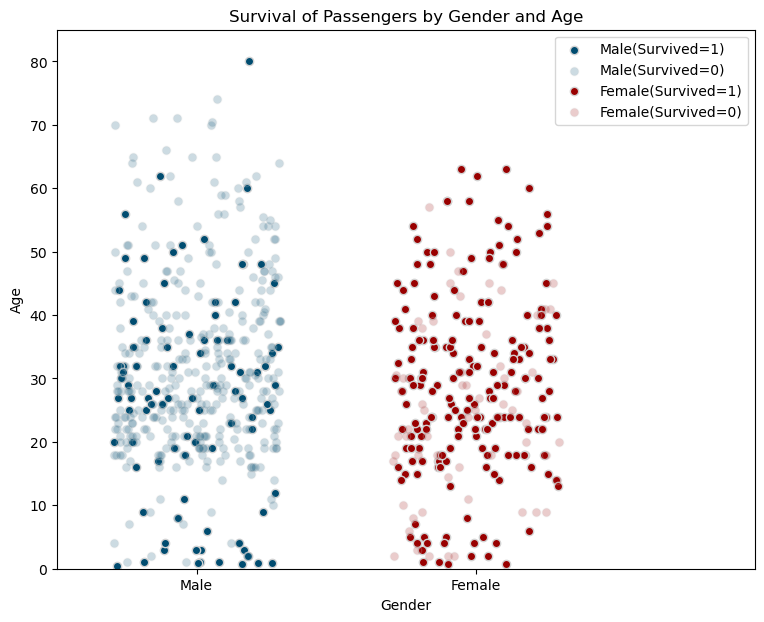

In [13]:
male_pos = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Age']
male_neg = data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age']
female_pos = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Age']
female_neg = data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Age']

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

ax.set_xlim(-0.5, 2)
ax.set_ylim(0, 85)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks(range(0, 85, 10))

ax.legend(loc='upper right')
ax.set_title('Survival of Passengers by Gender and Age')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')

plt.show()